# PAM - Partitioning Around Medoids

The **PAM (Partitioning Around Medoids)** algorithm is a clustering technique that aims to partition data into clusters, with the key difference from k-means being that PAM uses actual data points as cluster centers (medoids) rather than the mean of the data points in a cluster. PAM is robust to outliers because it minimizes the total sum of dissimilarities (e.g., Euclidean distance) instead of variance.

In this example, we'll use the PAM algorithm from the **_pyclustering_** library, which is a Python library for unsupervised machine learning, to perform clustering on some synthetic data.

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import distance_metric, type_metric
from sklearn.datasets import make_blobs

### Generate synthetic data

In [2]:
X, _ = make_blobs(n_samples = 200, centers = 3, cluster_std = 1.0,
                 random_state = 42)

### Visualize the synthetic data

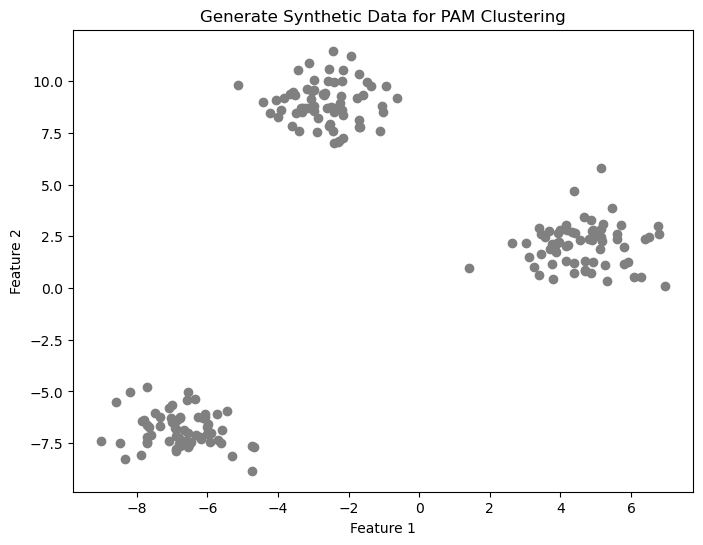

In [3]:
plt.figure(figsize = (8, 6))
plt.scatter(X[:, 0], X[:, 1], c = 'gray', label = 'Data Points')
plt.title('Generate Synthetic Data for PAM Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Apply PAM Algorithm

#### Set initial medoids (for simplicity, using random points as medoids)

In [4]:
initial_medoids = [0, 50, 100]

#### Define the distance metric for the PAM algorithm

In [5]:
metric = distance_metric(type_metric.EUCLIDEAN)

#### Create PAM Model and fit to the data

In [6]:
kmedoids_instance = kmedoids(X, initial_medoids, metric = metric)
kmedoids_instance.process()

### Get the cluster assignments and medoids

In [7]:
cluster_labels = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

#### Print the medoids

In [8]:
print(f"Medoids (cluster centers): {medoids}")

Medoids (cluster centers): [144, 171, 71]


### Visualize the results

#### Plot the original data and the medoids and also plot each clusters, highlight the medoids

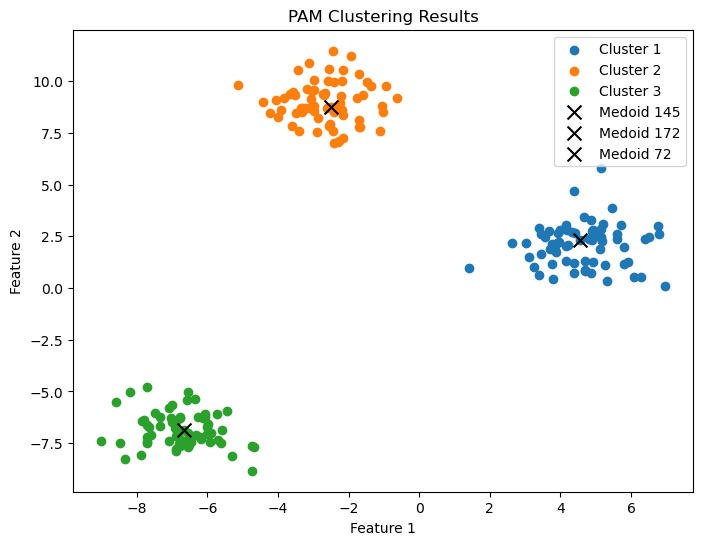

In [9]:
plt.figure(figsize = (8, 6))

for cluster in cluster_labels:
    plt.scatter(X[cluster, 0], X[cluster, 1], 
                label = f"Cluster {cluster_labels.index(cluster) + 1}" )

for medoid in medoids:
    plt.scatter(X[medoid, 0], X[medoid, 1], marker = 'x', color = 'black',
               s = 100, label = f"Medoid {medoid + 1}")
    
plt.title('PAM Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()
plt.show()